In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as LogNorm
import matplotlib.ticker as ticker
import math
import csv 
import sys

In [69]:
inFile = uproot.open( "../histograms/analysis_note/ratios_2d_mc.root")
q2_vals = np.linspace(2.25, 7.75, 12)
x_vals = np.linspace(0.12, 0.56, 12)
print(x_vals)


[0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56]


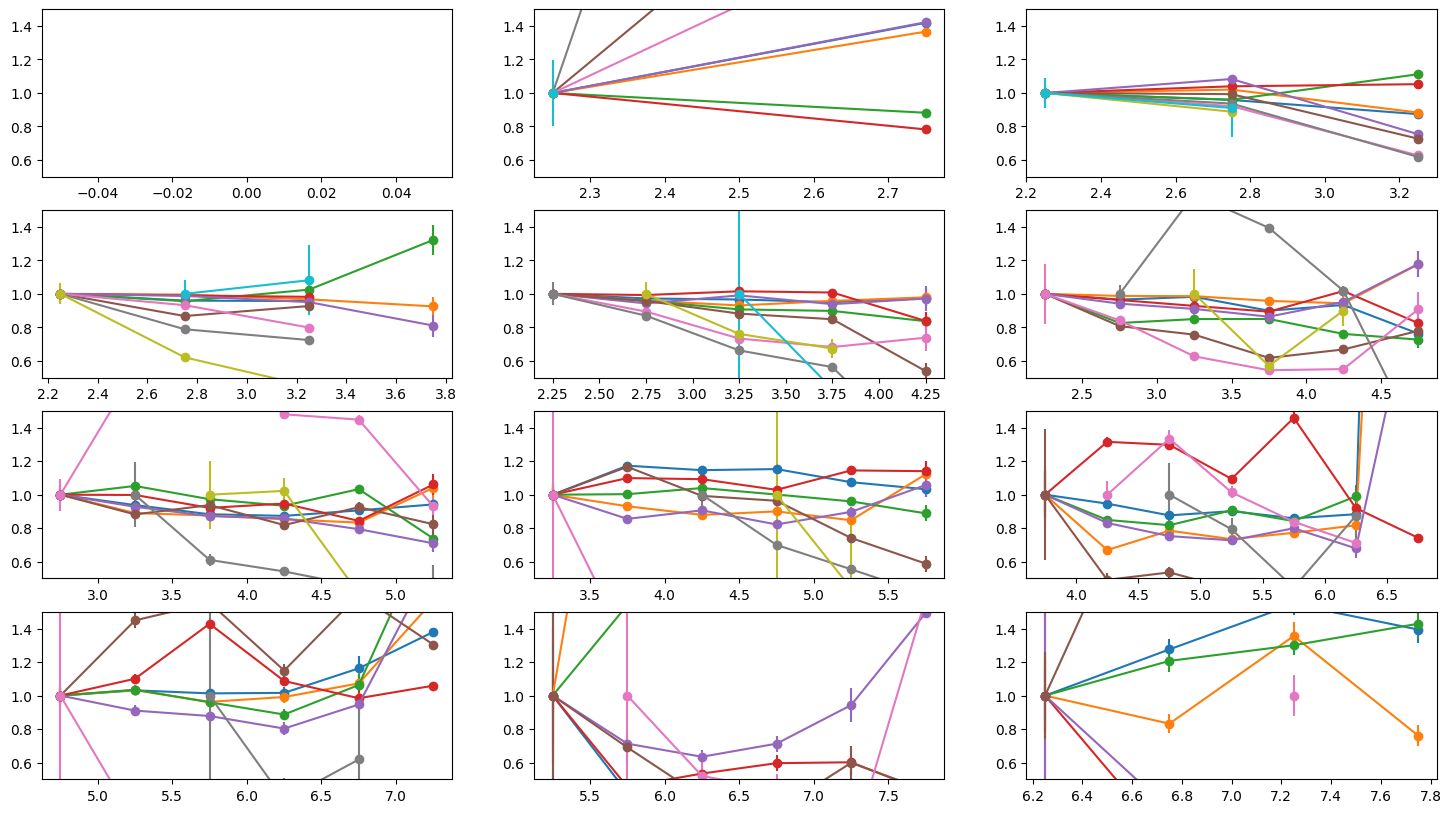

In [85]:
fig, axs = plt.subplots( 4, 3,figsize=(18, 10))

for x in range(0,12):
    data_points = [[] for q in range(12)]
    error_points = [[] for q in range(12)]
    for q in range(12):
        hist = inFile[f'hRatio_{q+1}_{x+1}']

        values =np.array( hist.values() )
        values[values <= 0] = np.nan
#if( np.isnan(values).all() ):
#	continue
        errors = np.array(hist.errors())
        data_points[q] = values
        error_points[q] = errors
    data_points = np.transpose(data_points)
    error_points = np.transpose(error_points)
    #ratio_err =  ratio*np.sqrt( (errors/values)**2 )

    for z in range(14):
        axs[math.floor(x/3), x%3].set_ylim(0.5,1.5)
        #axs[math.floor(x/3), x%3].set_yscale("log")
        axs[math.floor(x/3), x%3].errorbar(q2_vals, data_points[z]/data_points[z][np.argmax(data_points[z]>0)], error_points[z], marker='o')


			

[       nan 0.5973625  0.62217754 0.61939764 0.60732806 0.63113546
        nan        nan        nan        nan        nan        nan]
[       nan 0.5811841  0.5747571  0.55732787 0.557843   0.5484688
        nan        nan        nan        nan        nan        nan]
[       nan 0.5349696  0.5286389  0.5059968  0.5246363  0.56671447
        nan        nan        nan        nan        nan        nan]
[       nan 0.5516322  0.46594384 0.46716815 0.4637337  0.46428785
        nan        nan        nan        nan        nan        nan]
[       nan 0.48016885 0.4539083  0.4500771  0.44678992 0.4429473
        nan        nan        nan        nan        nan        nan]
[       nan 0.40728962 0.41835532 0.44351745 0.42941773 0.5274208
        nan        nan        nan        nan        nan        nan]
[       nan 0.3984634  0.38007647 0.42243585 0.47414434 0.5547939
        nan        nan        nan        nan        nan        nan]
[       nan 0.32700777 0.39407596 0.43939933 0.50469875    

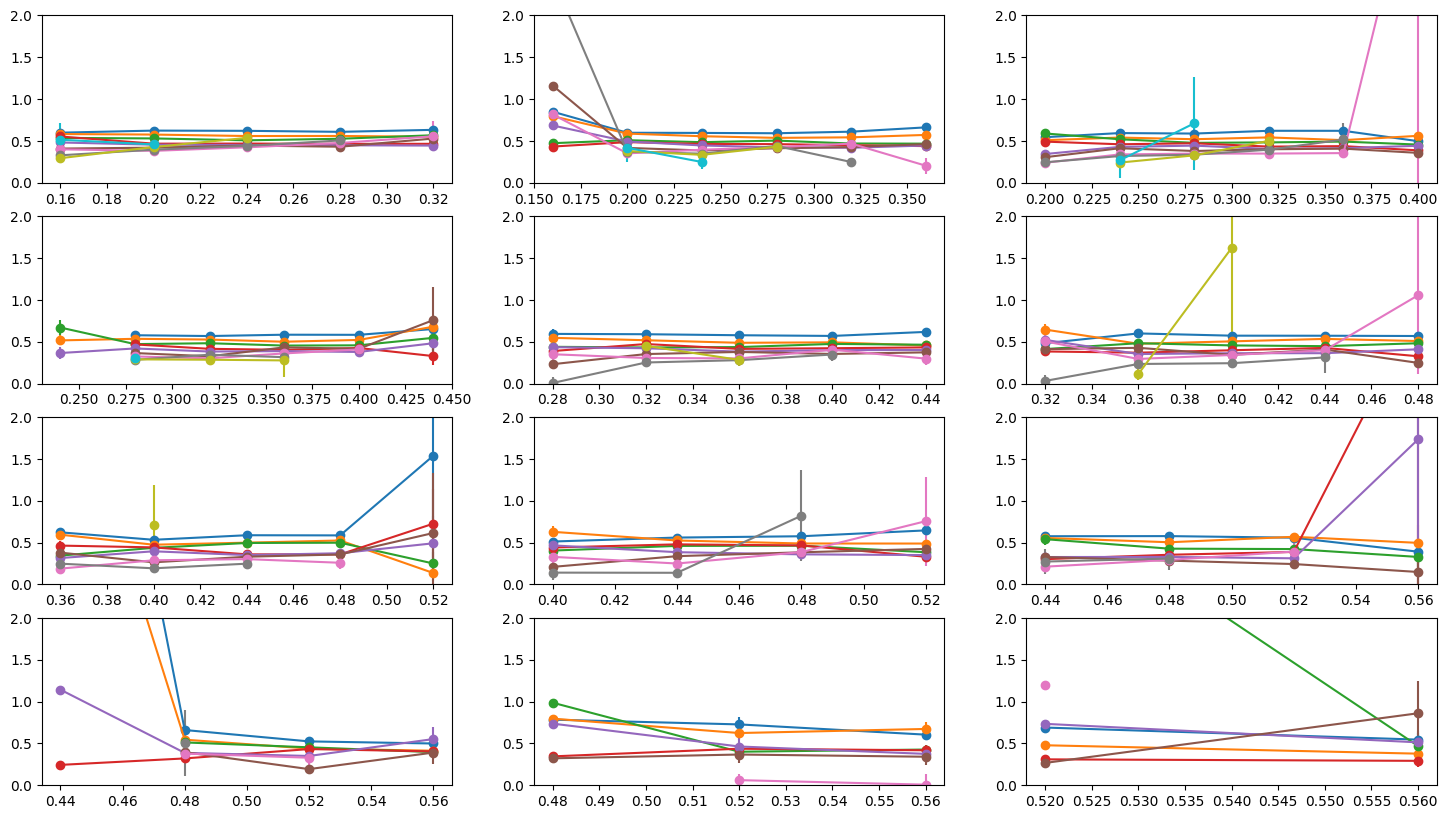

In [81]:
fig, axs = plt.subplots( 4, 3,figsize=(18, 10))

for q in range(0,12):
    data_points = [[] for q in range(12)]
    error_points = [[] for q in range(12)]
    for x in range(12):
        hist = inFile[f'hRatio_{q+1}_{x+1}']

        values =np.array( hist.values() )
        values[values <= 0] = np.nan
#if( np.isnan(values).all() ):
#	continue
        errors = np.array(hist.errors())
        data_points[x] = values
        error_points[x] = errors
    data_points = np.transpose(data_points)
    error_points = np.transpose(error_points)
    #ratio_err =  ratio*np.sqrt( (errors/values)**2 )

    for z in range(14):
        axs[math.floor(q/3), q%3].set_ylim(0,2)
        #axs[math.floor(x/3), x%3].set_yscale("log")
        axs[math.floor(q/3), q%3].errorbar(x_vals, np.asarray(data_points[z]), error_points[z], marker='o')
        #print(data_points[z][np.argmax(data_points[z]>0)])
        print(data_points[z])
			